# Customer Churn Dataset

<code>
- **customerID: Customer ID**

- **gender: Whether the customer is a male or a female**

- **SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)**

- **Partner: Whether the customer has a partner or not (Yes, No)**

- **Dependents: Whether the customer has dependents or not (Yes, No)**

- **tenure: Number of months the customer has stayed with the company**

- **PhoneService: Whether the customer has a phone service or not (Yes, No)**

- **MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)**

- **InternetService: Customer’s internet service provider (DSL, Fiber optic, No)**

- **OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)**

- **OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)**

- **DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)**

- **TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)**

- **StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)**

- **StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)**

- **Contract: The contract term of the customer (Month-to-month, One year, Two year)**

- **PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)**

- **PaymentMethodThe: customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))**

- **MonthlyCharges: The amount charged to the customer monthly**

- **TotalCharges: The total amount charged to the customer**

- **Churn: Whether the customer churned or not (Yes or No)**
</code>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize': [12, 10]}, font_scale=1.2)

In [2]:
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
data=pd.read_csv("dataset.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.drop("customerID",axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7000 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            6896 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
data.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7000.000000,7043,7043,6896.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.163143,NaN,NaN,33.041473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300440,NaN
std,NaN,0.369522,NaN,NaN,24.382260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.000258,NaN
min,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN
50%,NaN,0.000000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1400.550000,NaN
75%,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


In [7]:
data["SeniorCitizen"].value_counts()

0.0    5858
1.0    1142
Name: SeniorCitizen, dtype: int64

In [8]:
data["SeniorCitizen"].fillna(data["SeniorCitizen"].mode()[0],inplace=True)

In [9]:
data["tenure"].fillna(data["tenure"].median(),inplace=True)

In [10]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## EDA

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt  
plt.style.use('bmh')

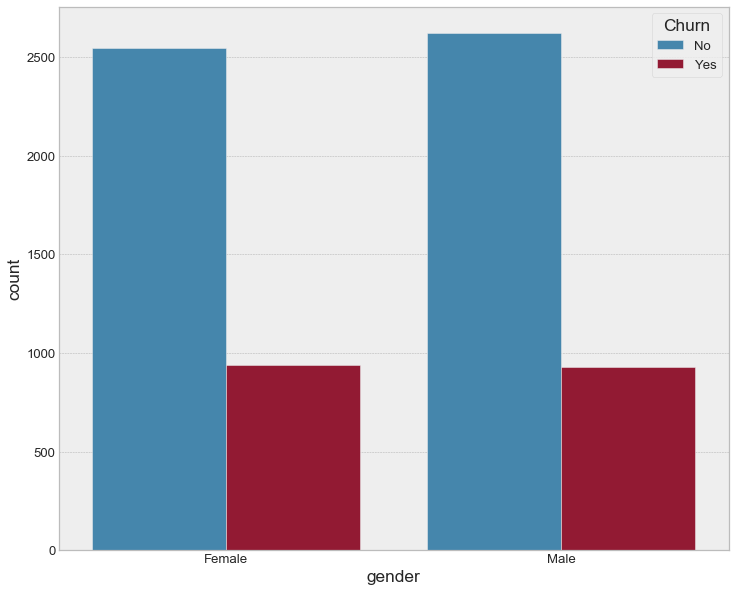

In [12]:
sns.countplot(data["gender"],hue=data["Churn"]);

if gender is Male or Female doesn't make any different in Churn

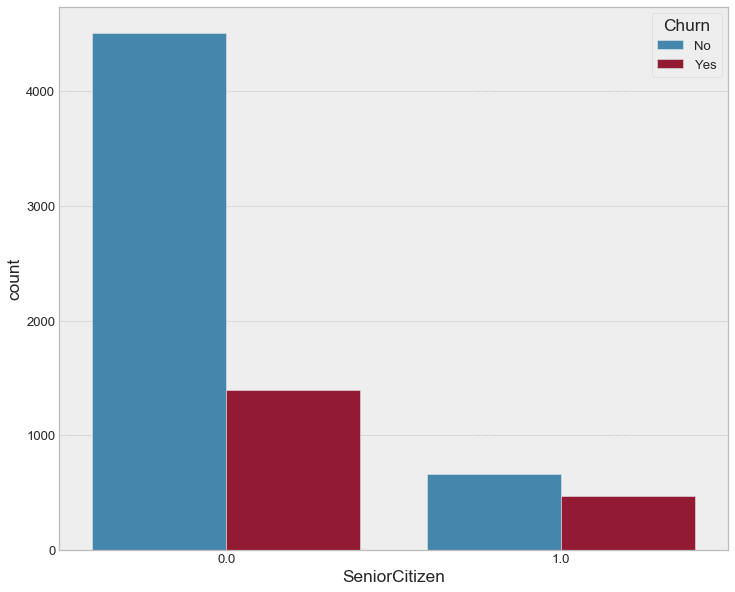

In [13]:
sns.countplot(data["SeniorCitizen"],hue=data["Churn"]);

The proportion between the largest if he stayed or left

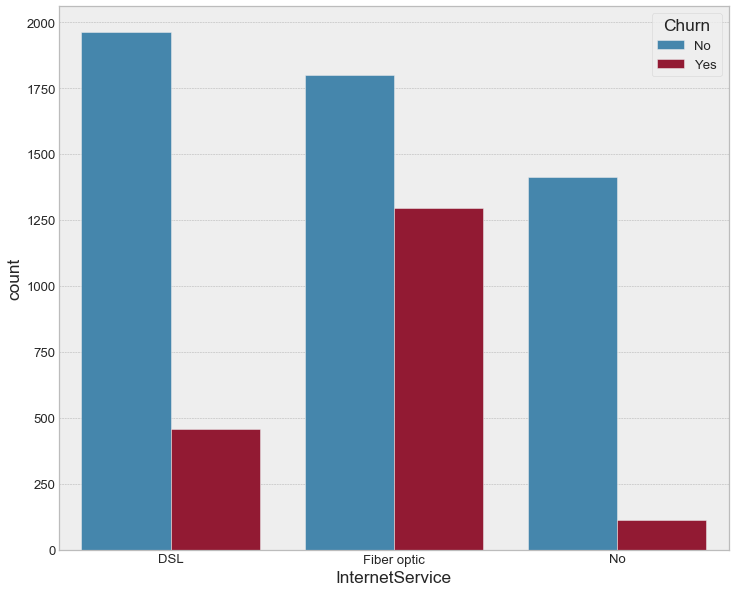

In [14]:
# internet service, churn 

sns.countplot(data["InternetService"],hue=data["Churn"]);

rely more on DSL for internet service
That is, the customer who uses optical fibers is left against the one who uses DSL

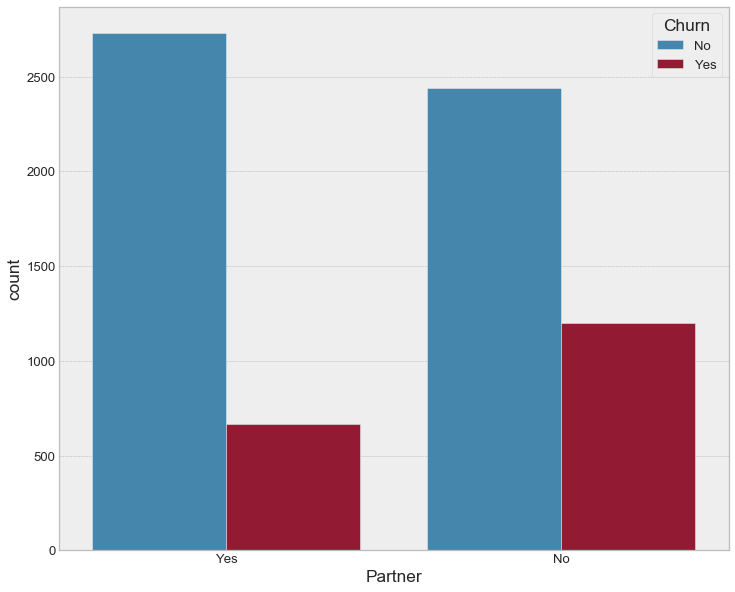

In [15]:
sns.countplot(data["Partner"],hue=data["Churn"]);


Most of the shows are for husbands
If the customer does not have a partner, he leaves the company

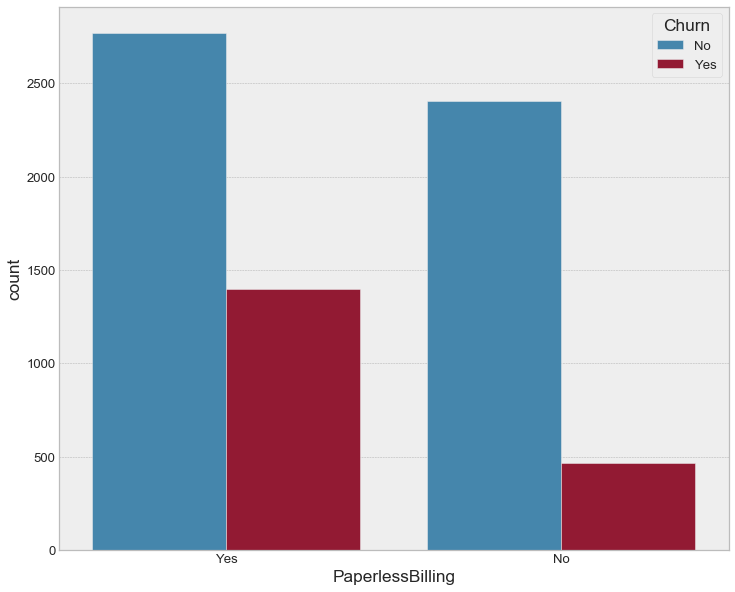

In [16]:
sns.countplot(data["PaperlessBilling"],hue=data["Churn"]);

Most of customer who have paperless billing leave company

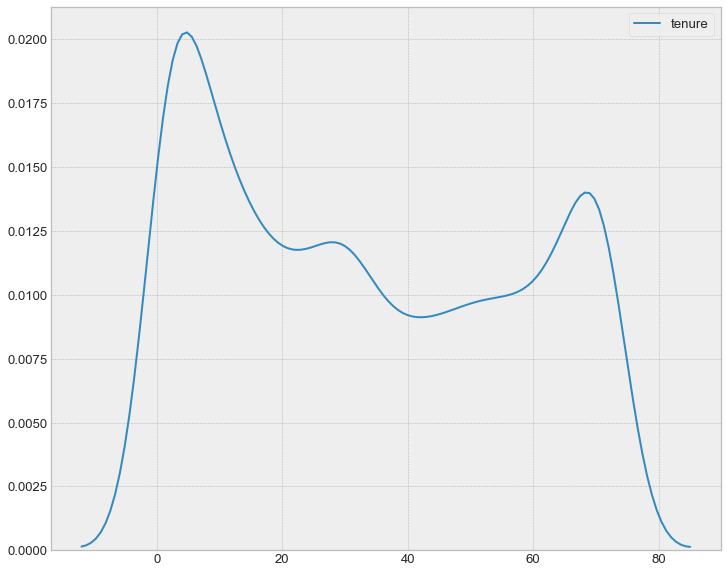

In [17]:
sns.kdeplot(data["tenure"]);

most months that customer stay with company between 3:8 months


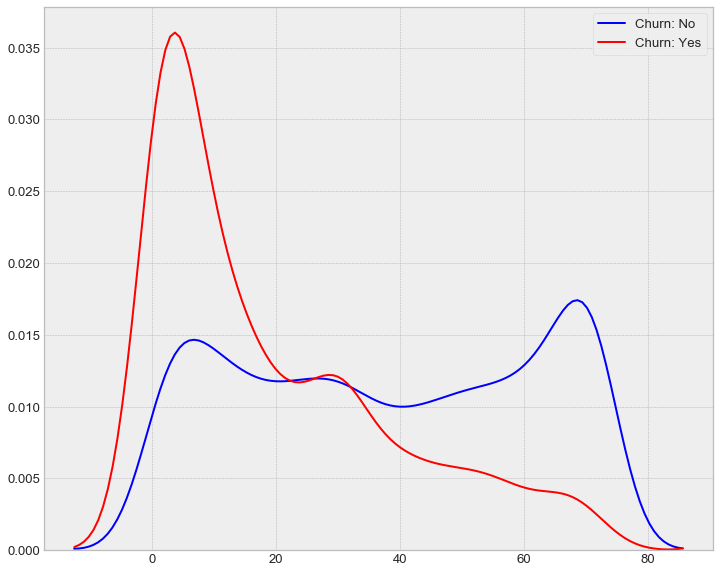

In [18]:
sns.kdeplot(data[data["Churn"]=='No']["tenure"],color='blue',label='Churn: No')
sns.kdeplot(data[data["Churn"]=='Yes']["tenure"],color='red',label='Churn: Yes')
plt.legend()
plt.show()

most months that customer leave with company between 3:8 months and
most months that customer stay with company between 60:70 months

Text(0.5, 0, 'Monthly charges')

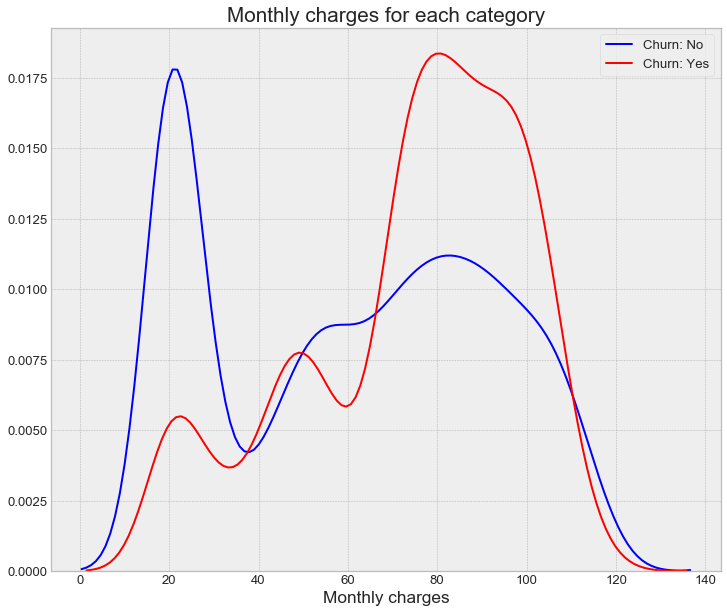

In [19]:
sns.kdeplot(data[data["Churn"]=='No']["MonthlyCharges"],color='blue',label='Churn: No')
sns.kdeplot(data[data["Churn"]=='Yes']["MonthlyCharges"],color='red',label='Churn: Yes')
plt.legend()
plt.title("Monthly charges for each category")
plt.xlabel("Monthly charges")

customer who leave company spend between 70:90 and
while customer who stay spend 20:25


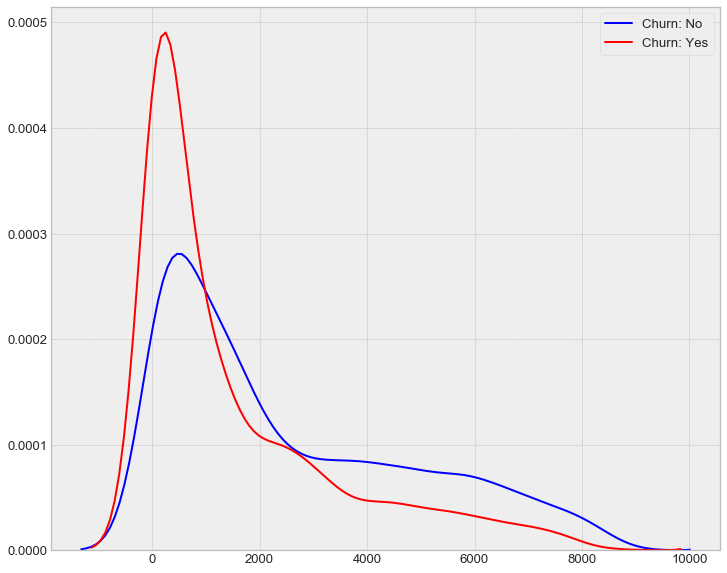

In [20]:
sns.kdeplot(data[data["Churn"]=='No']["TotalCharges"],color='blue',label='Churn: No')
sns.kdeplot(data[data["Churn"]=='Yes']["TotalCharges"],color='red',label='Churn: Yes')
plt.legend()
plt.show()

Customer who leave spend more money

In [21]:
for i in data.columns:
    if (data[i].dtype=='float') or (data[i].dtype=='int'):
        print(i)

SeniorCitizen
tenure
MonthlyCharges
TotalCharges


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc=StandardScaler()
data[["tenure","MonthlyCharges","TotalCharges"]]=sc.fit_transform(data[["tenure","MonthlyCharges","TotalCharges"]])

In [24]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,-0.123421,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,-0.994971,No
1,Male,0.0,No,No,0.042357,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.259629,-0.173876,No
2,Male,0.0,No,No,-1.283868,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.960399,Yes
3,Male,0.0,No,No,0.498246,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,-0.195400,No
4,Female,0.0,No,No,-1.283868,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,-0.941193,Yes


In [25]:
from sklearn.preprocessing import  LabelEncoder

In [26]:
lb=LabelEncoder()
data["gender"]=lb.fit_transform(data["gender"])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,Yes,No,-0.123421,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,-0.994971,No
1,1,0.0,No,No,0.042357,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.259629,-0.173876,No
2,1,0.0,No,No,-1.283868,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.960399,Yes
3,1,0.0,No,No,0.498246,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,-0.195400,No
4,0,0.0,No,No,-1.283868,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,-0.941193,Yes


In [27]:
# l_objects=["gender","Partner",........]
# for i in l_objects:
#     lb=LabelEncoder()
#     data[i]=lb.fit_transform(data[i])

In [28]:
for i in data.columns:
    if data[i].dtype=='object':
        lb=LabelEncoder()
        data[i]=lb.fit_transform(data[i])

In [29]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,-0.123421,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994971,0
1,1,0.0,0,0,0.042357,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173876,0
2,1,0.0,0,0,-1.283868,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.960399,1
3,1,0.0,0,0,0.498246,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.195400,0
4,0,0.0,0,0,-1.283868,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.941193,1


In [30]:
# data["degree"]=data["degree"].apply(map({"A":5,"b":4,"c":3}))

In [31]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.009571,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.013668,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.372148,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159284,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.009571,0.013668,0.372148,0.159284,1.000000,0.005830,0.336670,-0.028641,0.321144,0.367368,0.365717,0.319574,0.283770,0.290385,0.667986,0.000297,-0.360433,0.237585,0.816515,-0.342689
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.005830,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.336670,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.028641,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.321144,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.367368,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


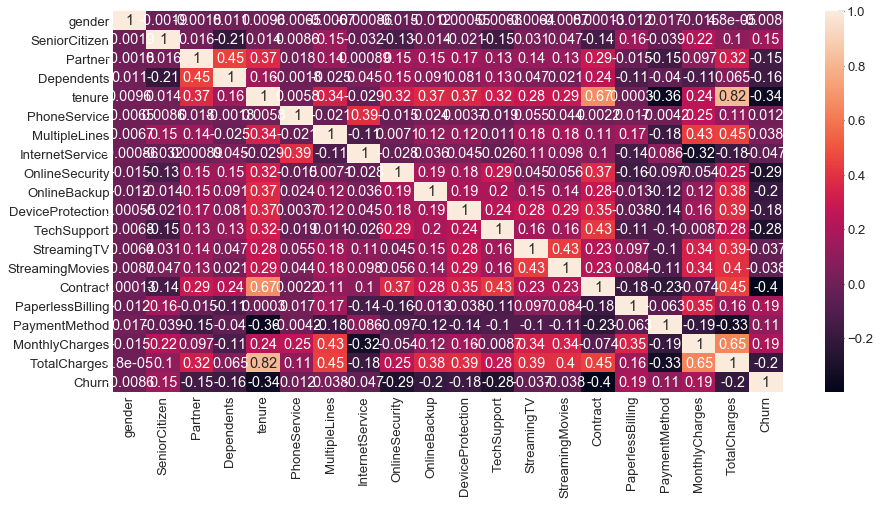

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

In [33]:
data["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [34]:
X=data.drop("Churn",axis=1)
y=data["Churn"]

In [35]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0.0,1,0,-0.123421,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994971
1,1,0.0,0,0,0.042357,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173876
2,1,0.0,0,0,-1.283868,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.960399
3,1,0.0,0,0,0.498246,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.195400
4,0,0.0,0,0,-1.283868,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.941193


In [36]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30)

# sampling data

In [39]:
training_data = pd.concat([X_train, y_train], axis=1)
training_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3008,0,0.0,0,0,-0.910868,1,0,2,1,1,1,1,1,1,1,0,3,-1.487697,-0.914568,0
1231,1,0.0,0,0,-0.537867,1,0,0,2,0,2,0,0,2,0,0,1,-0.012021,-0.390624,0
2128,1,0.0,1,1,0.332468,1,2,0,2,2,2,0,2,0,0,1,1,0.325324,0.326844,0
5681,0,1.0,1,0,0.042357,1,0,0,0,0,2,2,2,0,1,0,0,-0.018668,-0.078151,0
3658,0,0.0,0,0,-0.952312,1,0,0,0,0,2,2,0,0,0,0,2,-0.349366,-0.750738,0


In [40]:
from sklearn.utils import resample

In [41]:
not_Churn = training_data[training_data['Churn'] == 0]
Churn = training_data[training_data['Churn'] == 1]

# upsample minority
Churn_upsampled = resample(Churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_Churn), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_Churn, Churn_upsampled])

# check new class counts
upsampled['Churn'].value_counts()

1    3632
0    3632
Name: Churn, dtype: int64

In [42]:
X_train = upsampled.drop('Churn', axis=1)
y_train = upsampled['Churn']

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix,f1_score

In [46]:
f1_score(y_test,lr_pred)

0.6222537207654145

In [47]:
lr.score(X_test,y_test)

0.7477520113582584

In [48]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xbfd5ac8>)

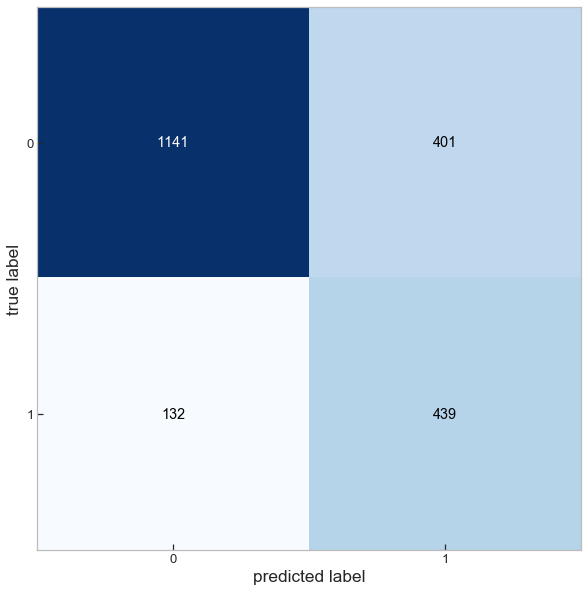

In [49]:
plot_confusion_matrix(confusion_matrix(y_test,lr_pred))

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc8afa88>)

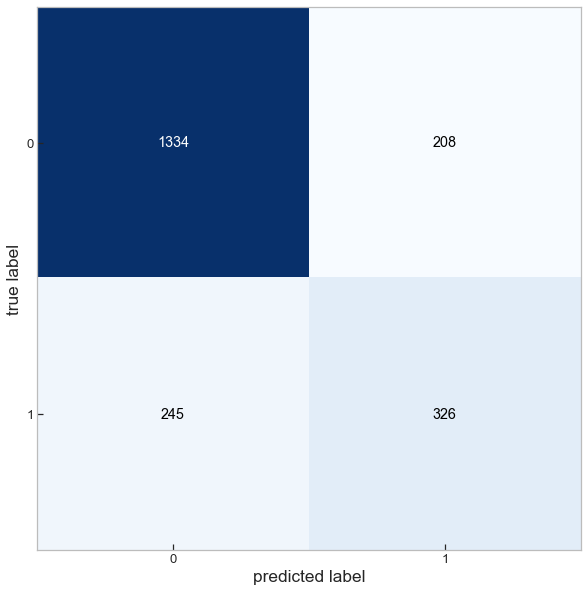

In [52]:
plot_confusion_matrix(confusion_matrix(y_test,rf_pred))

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)

(<Figure size 864x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc909ec8>)

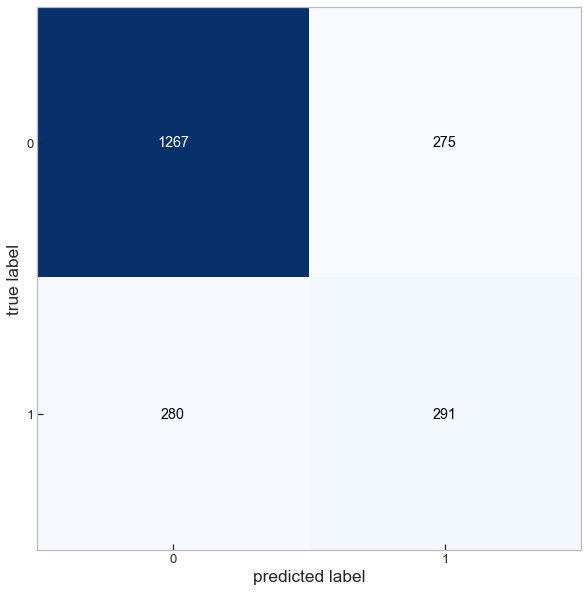

In [55]:
plot_confusion_matrix(confusion_matrix(y_test,dt_pred))

In [56]:
import pickle 

In [57]:
import pickle 
save_model=open("saved_model.sav","wb")
pickle.dump(dt,save_model)

In [58]:
len(X_test.iloc[1,:].values)

19

In [59]:
# import pickle
# model=pickle.load(open("saved_model.pk", 'rb'))

In [60]:
import numpy as np

In [61]:
X=data[["tenure","MonthlyCharges","TotalCharges","gender"]]
y=data["Churn"]

In [62]:
lb=LabelEncoder()
X["gender"]=lb.fit_transform(X["gender"])

C:\nada anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender
0,-0.123421,-1.160323,-0.994971,0
1,0.042357,-0.259629,-0.173876,1
2,-1.283868,-0.362660,-0.960399,1
3,0.498246,-0.746535,-0.195400,1
4,-1.283868,0.197365,-0.941193,0


In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30)

In [65]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
filename = 'finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))


In [67]:
import pickle
model=pickle.load(open("finalized_model.sav", 'rb'))

In [68]:
np.array([[1.        , 50       , 500       ,1500]])

array([[1.0e+00, 5.0e+01, 5.0e+02, 1.5e+03]])

In [69]:
model.predict(np.array([[1.        , 50       , 500       ,1500]]))

array([0])

In [70]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.785193 (0.016365)
KNN: 0.766329 (0.017373)
CART: 0.714199 (0.020171)
NB: 0.755375 (0.020907)
SVM: 0.788844 (0.016982)


In [71]:
print (cv_results)

[0.80527383 0.78093306 0.79513185 0.80730223 0.78904665 0.77687627
 0.76876268 0.75862069 0.79107505 0.81541582]
